In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Nifty 50 Historical Data - Cleaned.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2016-01-27,7437.75,7469.60,7477.90,7419.70,193390000.0,0.02
1,2016-01-28,7424.65,7426.50,7468.85,7409.60,283040000.0,-0.18
2,2016-01-29,7563.55,7413.35,7575.65,7402.80,307930000.0,1.87
3,2016-02-01,7555.95,7589.50,7600.45,7541.25,206640000.0,-0.10
4,2016-02-02,7455.55,7566.65,7576.30,7428.05,237340000.0,-1.33


In [3]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2016-01-27,7437.75,7469.60,7477.90,7419.70,193390000.0,0.02
1,2016-01-28,7424.65,7426.50,7468.85,7409.60,283040000.0,-0.18
2,2016-01-29,7563.55,7413.35,7575.65,7402.80,307930000.0,1.87
3,2016-02-01,7555.95,7589.50,7600.45,7541.25,206640000.0,-0.10
4,2016-02-02,7455.55,7566.65,7576.30,7428.05,237340000.0,-1.33


### Daily Returns calculation

In [5]:
df['Daily_Return'] = df['Price'].pct_change()
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Daily_Return
0,2016-01-27,7437.75,7469.60,7477.90,7419.70,193390000.0,0.02,NaN
1,2016-01-28,7424.65,7426.50,7468.85,7409.60,283040000.0,-0.18,-0.001761
2,2016-01-29,7563.55,7413.35,7575.65,7402.80,307930000.0,1.87,0.018708
3,2016-02-01,7555.95,7589.50,7600.45,7541.25,206640000.0,-0.10,-0.001005
4,2016-02-02,7455.55,7566.65,7576.30,7428.05,237340000.0,-1.33,-0.013288


### Basic Return Statistics

In [7]:
df['Daily_Return'] = df['Daily_Return'].replace([np.inf, -np.inf], np.nan)
df['Daily_Return'].describe()

count    2476.000000
mean        0.000543
std         0.010175
min        -0.129805
25%        -0.004097
50%         0.000693
75%         0.005735
max         0.087632
Name: Daily_Return, dtype: float64

### Annualized Return & Volatility

In [9]:
trading_days = 252
annual_return = df['Daily_Return'].mean() * trading_days
annual_volatality = df['Daily_Return'].std() * np.sqrt(trading_days)

annual_return, annual_volatality

(0.1367557170437332, 0.1615161621634296)

### CAGR (10-Year Compounded Return)

In [11]:
start_price = df['Price'].iloc[0]
end_price = df['Price'].iloc[-1]

years = (df['Date'].iloc[-1] - df['Date'].iloc[0]).days / 365

cagr = (end_price / start_price) ** (1 / years) - 1

cagr

0.12914242795955388

### Return Distribution (Fat Tails Check)

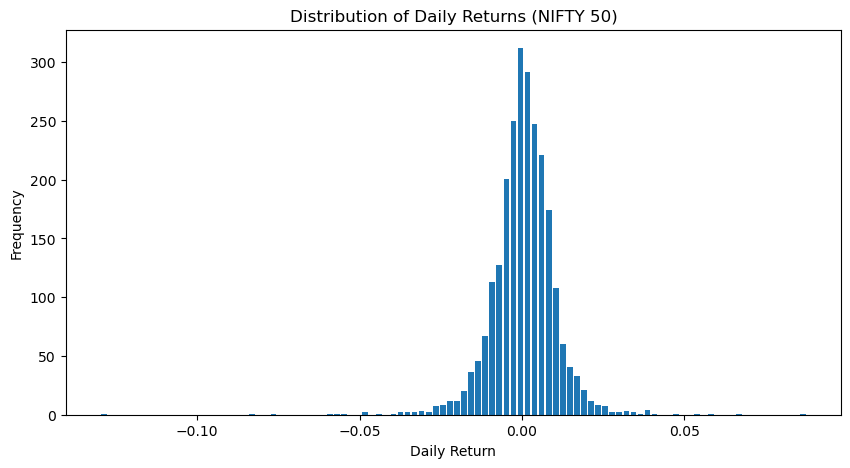

In [13]:
plt.figure(figsize = (10,5))
plt.hist(df['Daily_Return'].dropna(), bins = 100, rwidth = 0.8)
plt.title('Distribution of Daily Returns (NIFTY 50)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### Yearly Returns

In [15]:
df['Year'] = df['Date'].dt.year

yearly_return = df.groupby('Year')['Daily_Return'].apply(lambda x: (1+x).prod() - 1)

yearly_return

Year
2016    0.100575
2017    0.286459
2018    0.031513
2019    0.120220
2020    0.149017
2021    0.241193
2022    0.043290
2023    0.200278
2024    0.088048
2025    0.105089
2026   -0.041369
Name: Daily_Return, dtype: float64

### Best & Worst Years

In [17]:
best_year = yearly_return.idxmax()

worst_year = yearly_return.idxmin()

best_year, worst_year

(2017, 2026)

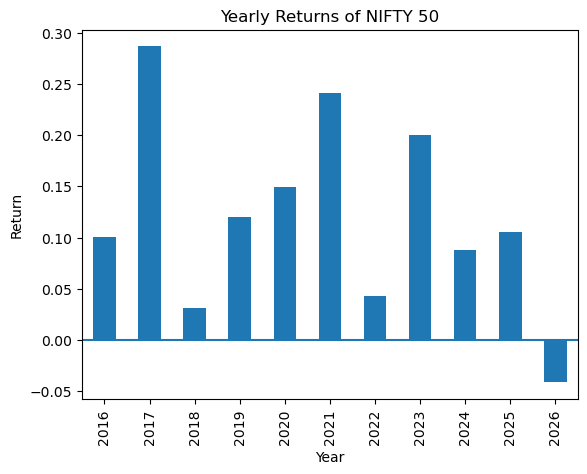

In [18]:
yearly_return.plot(kind = 'bar')
plt.title('Yearly Returns of NIFTY 50')
plt.xlabel('Year')
plt.ylabel('Return')
plt.axhline(0)
plt.show()